<a href="https://colab.research.google.com/github/Misha0714/portfolio/blob/main/faruki_misha_hw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import random
import tensorflow as tf
from tensorflow import keras

1.Set random seed to 2023, for reproducibility of results.

In [ ]:
#ensures you get the same results everytime you run
tf.random.set_seed(2023)

Load the datasets

In [ ]:
fashion = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion.load_data()

4422102/4422102 [==============================] - 1s 0us/step


3. Separate the dataset into feature set and target variable. Also separate the train and test partitions.

In [ ]:
X_train, y_train = train_images / 255.0, train_labels
X_test, y_test = test_images / 255.0, test_labels


4. Print the shapes of the train and test sets for the features and target.

In [ ]:
print("Train features shape:", X_train.shape)
print("Train labels shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Train features shape: (60000, 28, 28)
Train labels shape: (60000,)
Test features shape: (10000, 28, 28)
Test labels shape: (10000,)


5. Is the target variable values clothing or numbers?

  ** The values are numbers **

6. If it is numbers, then how would you map numbers to clothing? Hint: Use a data dictionary

In [ ]:
clothesDict = {0:'Tshirt/top', 1:'Trouser', 2:'Pullover', 3:'Dress',4:'Coat', 5:'Sandal',6:'Shirt', 7:'Sneaker',8:'Bag', 9:'Ankle boot'}

7. Show a histogram (count) of the apparel.

[Text(0, 0, 'Tshirt/top'),
 Text(1, 0, 'Trouser'),
 Text(2, 0, 'Pullover'),
 Text(3, 0, 'Dress'),
 Text(4, 0, 'Coat'),
 Text(5, 0, 'Sandal'),
 Text(6, 0, 'Shirt'),
 Text(7, 0, 'Sneaker'),
 Text(8, 0, 'Bag'),
 Text(9, 0, 'Ankle boot')]

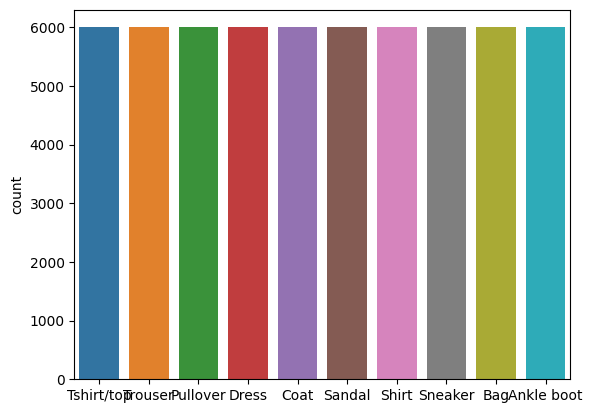

In [ ]:
hist = sb.countplot(x = y_train)
hist.set_xticklabels(clothesDict.values())

8. Display 25 random apparel from the train dataset. Display their labels as shown below.

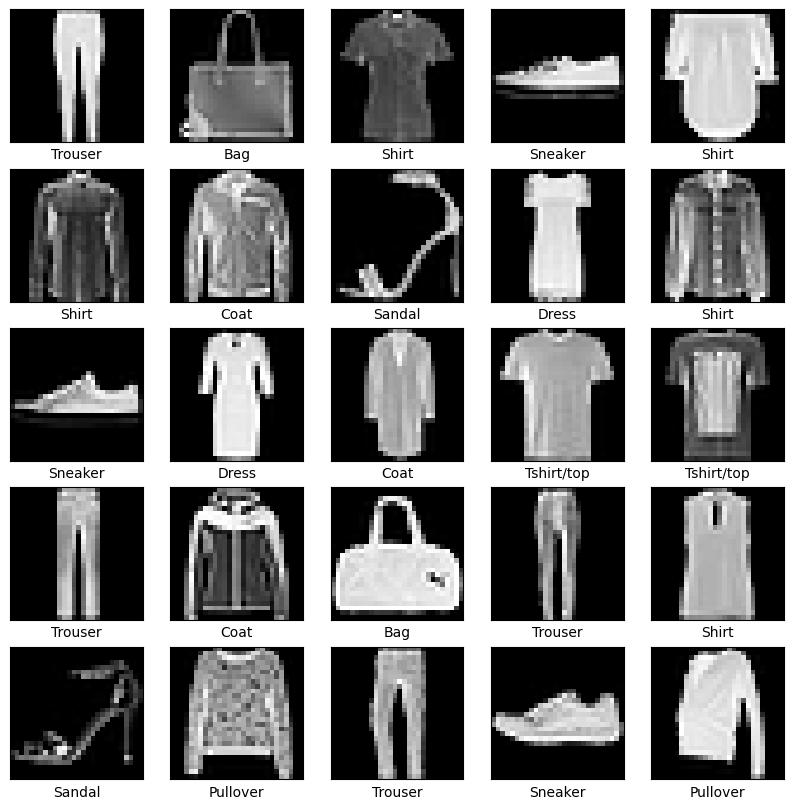

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    rand_index = np.random.randint(0, len(X_train))
    plt.imshow(X_train[rand_index], cmap=plt.cm.gray)
    plt.xlabel(clothesDict[y_train[rand_index]])

9. Scale the train and test features.

In [ ]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

10. Create a keras model of sequence of layers.

      Flatten layer and two dense layers.
      
      Experiment with number of neurons and activation functions.

In [ ]:
#adding and flattening a layer
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


11. Add a dense layer as output layer. Choose the appropriate number of neurons and activation function.

12. Display the model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


13. Set the model loss function as sparse_categorical_crossentropy. Set the optimizer as sgd. Set the metrics as accuracy

In [ ]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

14. Fit to train the model. Use at least 25 epochs.


In [ ]:
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test))

Epoch 1/25
1875/1875 [==============================] - 15s 7ms/step - loss: 0.7569 - accuracy: 0.7526 - val_loss: 0.5604 - val_accuracy: 0.8048
Epoch 2/25
1875/1875 [==============================] - 16s 8ms/step - loss: 0.5031 - accuracy: 0.8228 - val_loss: 0.4979 - val_accuracy: 0.8263
Epoch 3/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4559 - accuracy: 0.8402 - val_loss: 0.4749 - val_accuracy: 0.8344
Epoch 4/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4274 - accuracy: 0.8495 - val_loss: 0.4456 - val_accuracy: 0.8444
Epoch 5/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4065 - accuracy: 0.8568 - val_loss: 0.4332 - val_accuracy: 0.8478
Epoch 6/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3908 - accuracy: 0.8629 - val_loss: 0.4268 - val_accuracy: 0.8502
Epoch 7/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3770 - accuracy: 0.8672 - val_loss: 0.4116 - val_accu

15. Plot the loss curve

<Axes: >

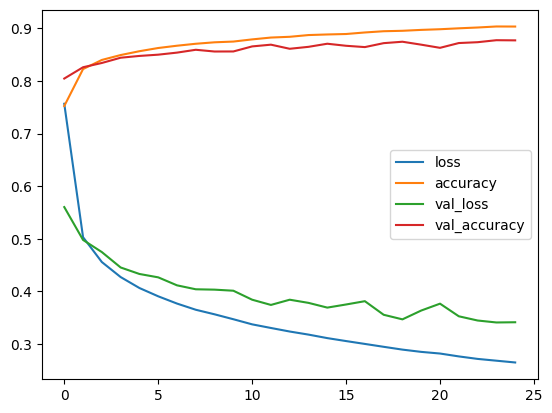

In [ ]:
pd.DataFrame(history.history).plot()

16. Display the accuracy of your model

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3414 - accuracy: 0.8774 - 527ms/epoch - 2ms/step

Test accuracy: 0.8773999810218811


17. Now, display the predicted apparel of the first row in the test dataset. Also display the actual apparel. Show both actual and predicted letters (as title) on the image of the apparel.

313/313 [==============================] - 1s 2ms/step


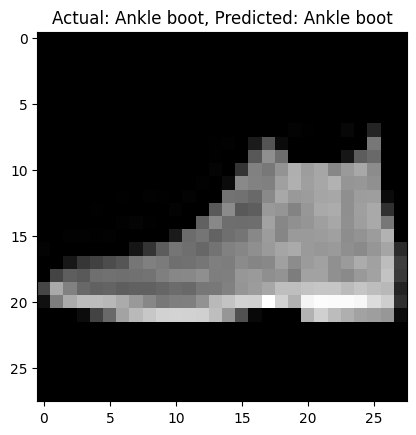

In [ ]:
predictions = model.predict(X_test)
first_test_image = X_test[0].reshape((28, 28))
plt.imshow(first_test_image, cmap=plt.cm.gray)
plt.title(f"Actual: {clothesDict[y_test[0]]}, Predicted: {clothesDict[np.argmax(predictions[0])]}")
plt.show()

18.  Finally, display the actual and predicted label of a misclassified apparel.

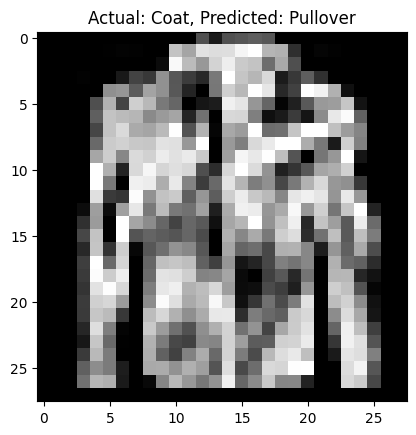

In [ ]:
misclassified_indices = np.where(np.argmax(predictions, axis=1) != y_test)[0]
misclassified_index = misclassified_indices[0]

misclassified_image = X_test[misclassified_index].reshape((28, 28))
plt.imshow(misclassified_image, cmap=plt.cm.gray)
plt.title(f"Actual: {clothesDict[y_test[misclassified_index]]}, Predicted: {clothesDict[np.argmax(predictions[misclassified_index])]}")
plt.show()